# ABOUT THE DATA

---


 This dataset contains voice measurements from 31 people, including 23 with Parkinson's disease. Each row represents one of 195 voice recordings, and the "status" column indicates whether a person is healthy (0) or has Parkinson's disease (1). The goal is to distinguish healthy individuals from those with Parkinson's based on their voice measurements.

 **ATTRIBUTES**

 Attribute Information:

- **name**: Subject name and recording number
- **MDVP:Fo(Hz)**: Average vocal frequency
- **MDVP:Fhi(Hz)**: Max vocal frequency
- **MDVP:Flo(Hz)**: Min vocal frequency
- **MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP**: Frequency variation measures
- **MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA**: Amplitude variation measures
- **NHR, HNR**: Noise-to-tone ratio measures
- **status**: Health status (1 = Parkinson's, 0 = healthy)
- **RPDE, D2**: Dynamical complexity measures
- **DFA**: Fractal scaling exponent
- **spread1, spread2, PPE**: Frequency variation measures




# 1. EDA Analysis



**importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


**Reading the top 5 raws of the Data**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/parkinsons.data")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


**Checking column Names,Data Types and Null values**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1



*   No null values
*   1 object Dtype'name', 1 int Dtype'status' rest are floats



**Data Description**

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


**Sum Of Unique Values in each column**

In [ ]:
df.nunique()

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
status                2
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
dtype: int64

**Checking correlation among Variables**

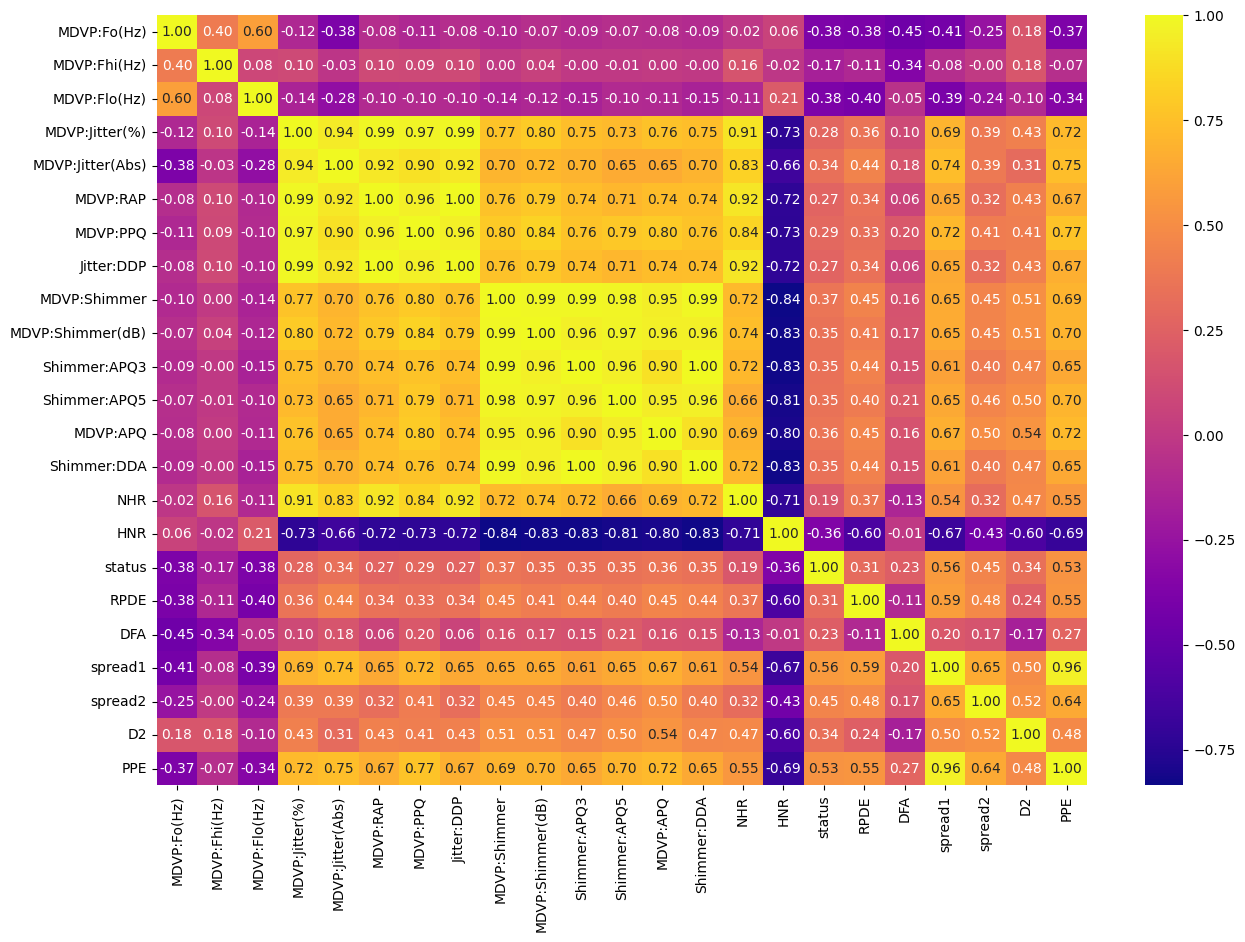

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.drop('name',axis=1).corr(),annot=True, fmt=".2f", cmap='plasma')
plt.show()

Spread1, PPE, and Spread2 are strongly positively correlated with Parkinson's status, indicating that higher values in these features increase the likelihood of the disease. Conversely, MDVP:Fo(Hz) and MDVP:Flo(Hz) show strong negative correlations, meaning lower values in these features are associated with Parkinson's disease.

**Target Distribution**

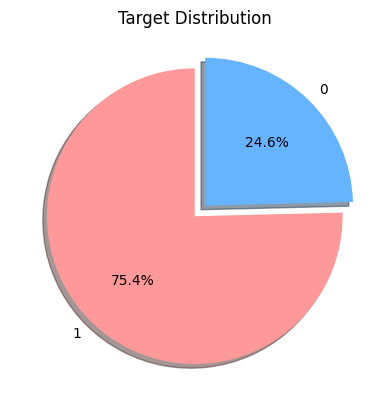

In [ ]:
df['status'].value_counts().plot(kind='pie',startangle = 90, autopct = '%1.1f%%', explode = (0,0.1), shadow = True, title = 'Target Distribution',colors=['#ff9999','#66b3ff'])
plt.ylabel('')
plt.show()

75.4% of the data in the data set are +ve for Parkins disease.

**Grouping data based on targetvariable**

In [ ]:
df.drop('name', axis = 1).groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


**Checking Outliers**

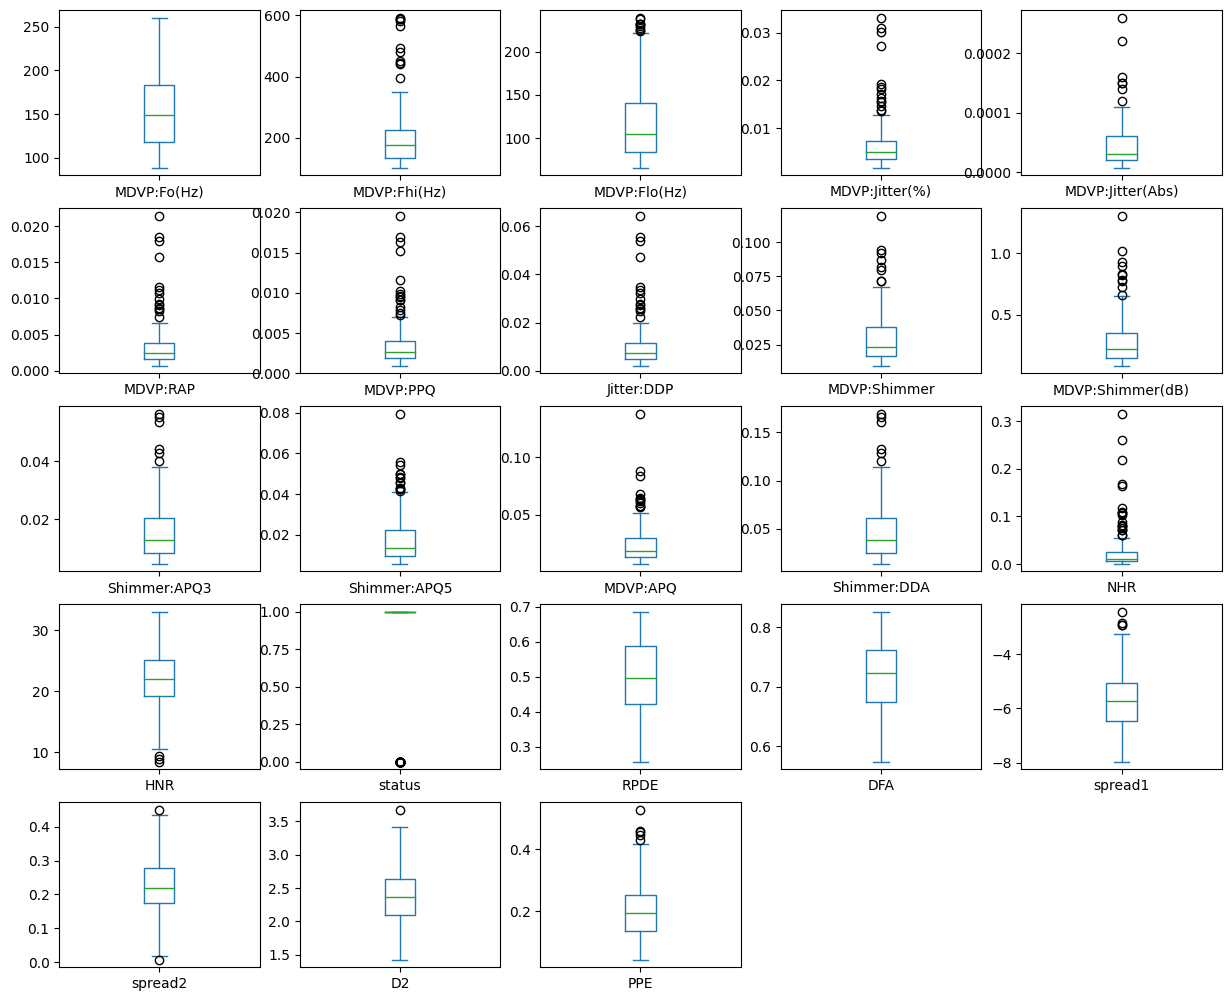

In [ ]:
df.drop('name', axis = 1).plot(kind='box',subplots=True,layout=(6,5),figsize=(15,15))
plt.show()

These box plots summarize the distribution of various features related to Parkinson's disease, indicating the central tendency, variability, and presence of outliers. Notably, most features exhibit significant outliers and a wide range of values, which suggests considerable variability in the dataset. The feature 'status' is categorical, showing clear separation between two classes, which is likely indicative of whether an individual has Parkinson's disease.

**Plotting Spread1, PPE by Target**

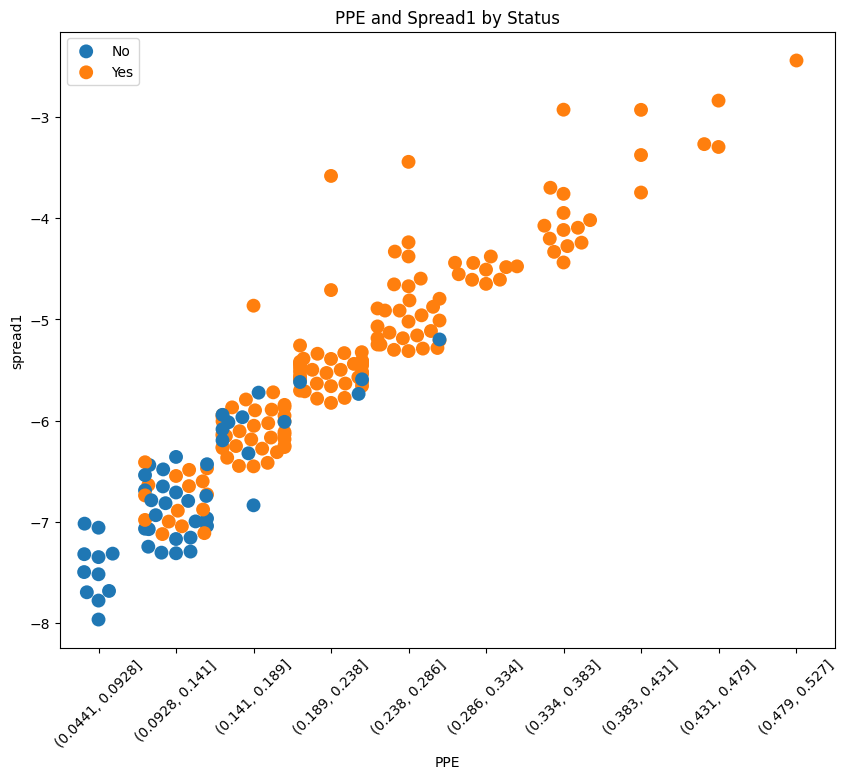

In [ ]:
df['PPE_1'] = df['PPE'].astype('category')
df['PPE_1'] = pd.cut(df['PPE'], bins =10)
plt.figure(figsize = (10,8))
sns.swarmplot(x = 'PPE_1', y = 'spread1', hue ='status', data = df, size = 10)
plt.title('PPE and Spread1 by Status')
plt.xlabel('PPE')
plt.ylabel('spread1')
plt.xticks(rotation=45)
plt.legend(labels = ['No', 'Yes'])
plt.show()

Higher values in PPE and Spread1 lead to higher chances of having the disease

**Plotting Spread2 and MDVP:Shimmer by Status**

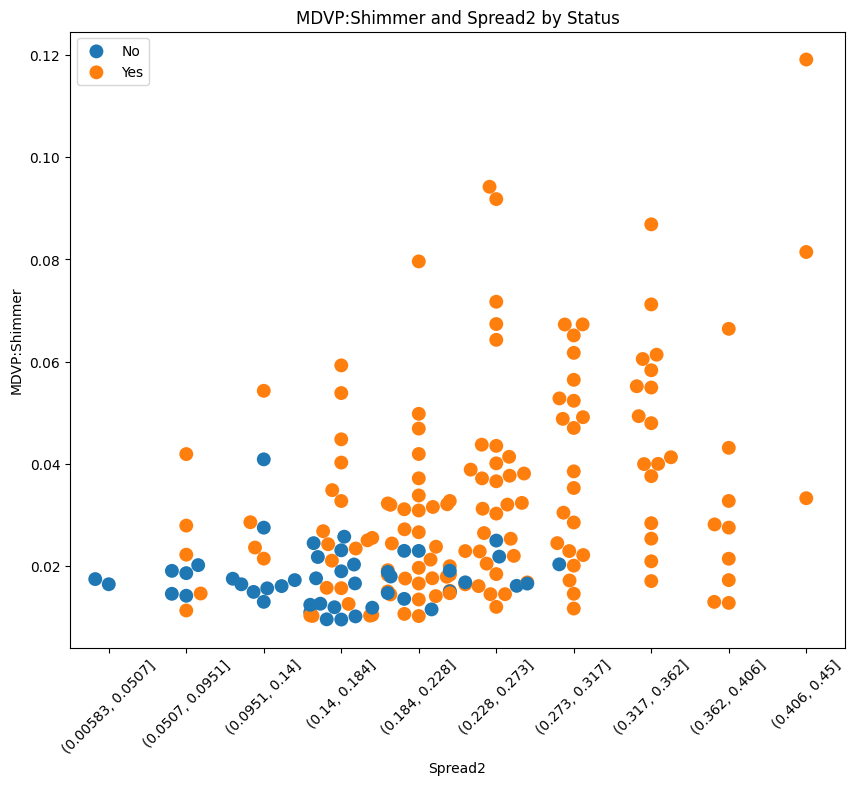

In [ ]:
df['spread2_1'] = df.spread2
df['spread2_1'] = pd.cut(df['spread2_1'], bins =10)
plt.figure(figsize = (10,8))
sns.swarmplot(x = 'spread2_1', y = 'MDVP:Shimmer', hue ='status', data = df, size = 10)
plt.title('MDVP:Shimmer and Spread2 by Status')
plt.xlabel('Spread2')
plt.ylabel('MDVP:Shimmer')
plt.xticks(rotation=45)
plt.legend(labels = ['No', 'Yes'])
plt.show()

Higher values in Spread 2 and MDVP:Shimmer lead to higher chances of having the disease

# 2. MACHINE LEARNING





**Training Data**

In [ ]:
#importing trainlibrary
from sklearn.model_selection import train_test_split

#Naming X and Y features
x = df.drop(['name','status', 'PPE_1', 'spread2_1'],axis=1)
y = df['status']

#Splitting the data
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

print("Training: ", X_train.shape, y_train.shape)
print("Testing: ", X_test.shape, y_test.shape)


Training:  (156, 22) (156,)
Testing:  (39, 22) (39,)


In [ ]:
X_train.dtypes.reset_index()

,index,0
0,MDVP:Fo(Hz),float64
1,MDVP:Fhi(Hz),float64
2,MDVP:Flo(Hz),float64
3,MDVP:Jitter(%),float64
4,MDVP:Jitter(Abs),float64
5,MDVP:RAP,float64
6,MDVP:PPQ,float64
7,Jitter:DDP,float64
8,MDVP:Shimmer,float64
9,MDVP:Shimmer(dB),float64


**Scaling the Features**

In [ ]:
#Using Standard Scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
x_train = sc.transform(X_train)
x_test = sc.transform(X_test)

**Fitting The Model (Support Vector Model)**

In [ ]:
from sklearn import svm

In [ ]:
model = svm.SVC(kernel = 'linear', probability= True)
model.fit(x_train,y_train)

SVC(kernel='linear', probability=True)

**MODEL EVALUATION**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#Model for training and Test
x_pred_train = model.predict(x_train)
x_pred_test = model.predict(x_test)

#checking training and test accuracy
print("Training Accuracy: ", accuracy_score(y_train, x_pred_train))
print("Testing Accuracy: ", accuracy_score(y_test, x_pred_test))

Training Accuracy:  0.8846153846153846
Testing Accuracy:  0.8717948717948718


In [ ]:
#calculate probabilities for Roc-Auc
y_pred_prob = model.predict_proba(x_test)[:,1]

#calculate metrics
precision = precision_score(y_test, x_pred_test)
recall = recall_score(y_test, x_pred_test)
f1 = f1_score(y_test, x_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_prob)

#print metrics
print(f"Precision: {precision: .4f}")
print(f"Recall: {recall: .4f}")
print(f"F1 Score: { f1: .4f}")
print(f"ROC AUC: {roc_auc: .4f}")

Precision:  0.9062
Recall:  0.9355
F1 Score:  0.9206
ROC AUC:  0.8185


- **Precision (0.9062):** Indicates a high level of accuracy in correctly identifying positive cases; 90.62% of the predicted positives are true positives.
- **Recall (0.9355):** Shows the model's effectiveness in capturing actual positives; 93.55% of the actual positives are correctly identified.
- **F1 Score (0.9206):** Represents the balance between precision and recall, indicating robust overall performance.
- **ROC AUC (0.8185):** Reflects good discriminatory ability of the model to distinguish between positive and negative cases, though there is room for improvement.

**Feature Importance**

In [ ]:
# Access the coefficients
coefficients = model.coef_[0]

# Create a DataFrame to display feature names and their corresponding coefficients
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort the DataFrame by absolute values of coefficients in descending order
feature_importance['Absolute_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False).drop('Absolute_Coefficient', axis=1)

# Reset the index
feature_importance = feature_importance.reset_index(drop=True)

# Display the feature importance ranking
print(feature_importance)

             Feature  Coefficient
0            spread1     1.145376
1     MDVP:Jitter(%)    -0.755728
2           MDVP:APQ     0.735968
3   MDVP:Jitter(Abs)    -0.730562
4           MDVP:RAP     0.700639
5         Jitter:DDP     0.698320
6            spread2     0.425204
7                PPE     0.422713
8               RPDE    -0.403131
9                DFA     0.389145
10                D2     0.304452
11      MDVP:Shimmer     0.243707
12       Shimmer:DDA    -0.216627
13      Shimmer:APQ3    -0.215151
14               HNR     0.200717
15      Shimmer:APQ5     0.169448
16          MDVP:PPQ    -0.152529
17      MDVP:Flo(Hz)    -0.116248
18       MDVP:Fo(Hz)    -0.099476
19      MDVP:Fhi(Hz)    -0.087892
20               NHR     0.068534
21  MDVP:Shimmer(dB)    -0.034614


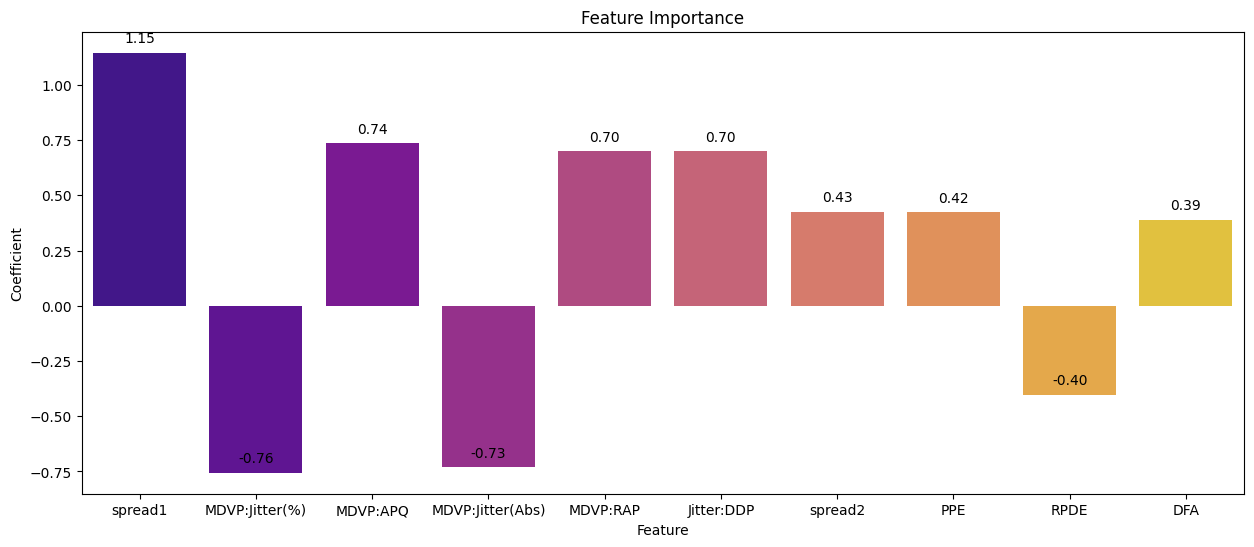

In [ ]:
#Top 10 Features
top_features = feature_importance.head(10)

plt.figure(figsize=(15, 6))
ax = sns.barplot(x='Feature', y='Coefficient', data=top_features, palette = 'plasma')
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Coefficient')

# Add data labels above the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
plt.show()

**PREDICTION 1**

In [ ]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = sc.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

[0]
The Person does not have Parkinsons Disease


**Saving The Model**

In [ ]:
import pickle
file_name = 'parkinsons_model.pkl'
pickle.dump(model, open(file_name, 'wb'))

**Loading The Model**

In [ ]:
loaded_model = pickle.load(open(file_name, 'rb'))

In [ ]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = sc.transform(input_data_reshaped)

prediction = loaded_model.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

[0]
The Person does not have Parkinsons Disease


**Grouped Mean Values**

In [ ]:
# Drop the 'name', 'PPE_1', and 'spread2_1' columns
df_mean = df.drop(['name', 'PPE_1', 'spread2_1'], axis=1)

# Group by 'status' and calculate the mean of the remaining columns
mean_values = df_mean.groupby('status').mean().round(2)

print(mean_values)


        MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
status                                                            
0            181.94        223.64        145.21            0.00   
1            145.18        188.44        106.89            0.01   

        MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
status                                                                   
0                    0.0       0.0       0.0        0.01          0.02   
1                    0.0       0.0       0.0        0.01          0.03   

        MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA   NHR    HNR  RPDE   DFA  \
status                    ...                                                   
0                   0.16  ...      0.01         0.03  0.01  24.68  0.44  0.70   
1                   0.32  ...      0.03         0.05  0.03  20.97  0.52  0.73   

        spread1  spread2    D2   PPE  
status                                
0         -6.76     0.16  2.15 